# Problem Set 4
## Ying Sun

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy.linalg as LA

## 1. Discrete approximation of an AR(1) process 

### (a)

<IPython.core.display.Javascript object>


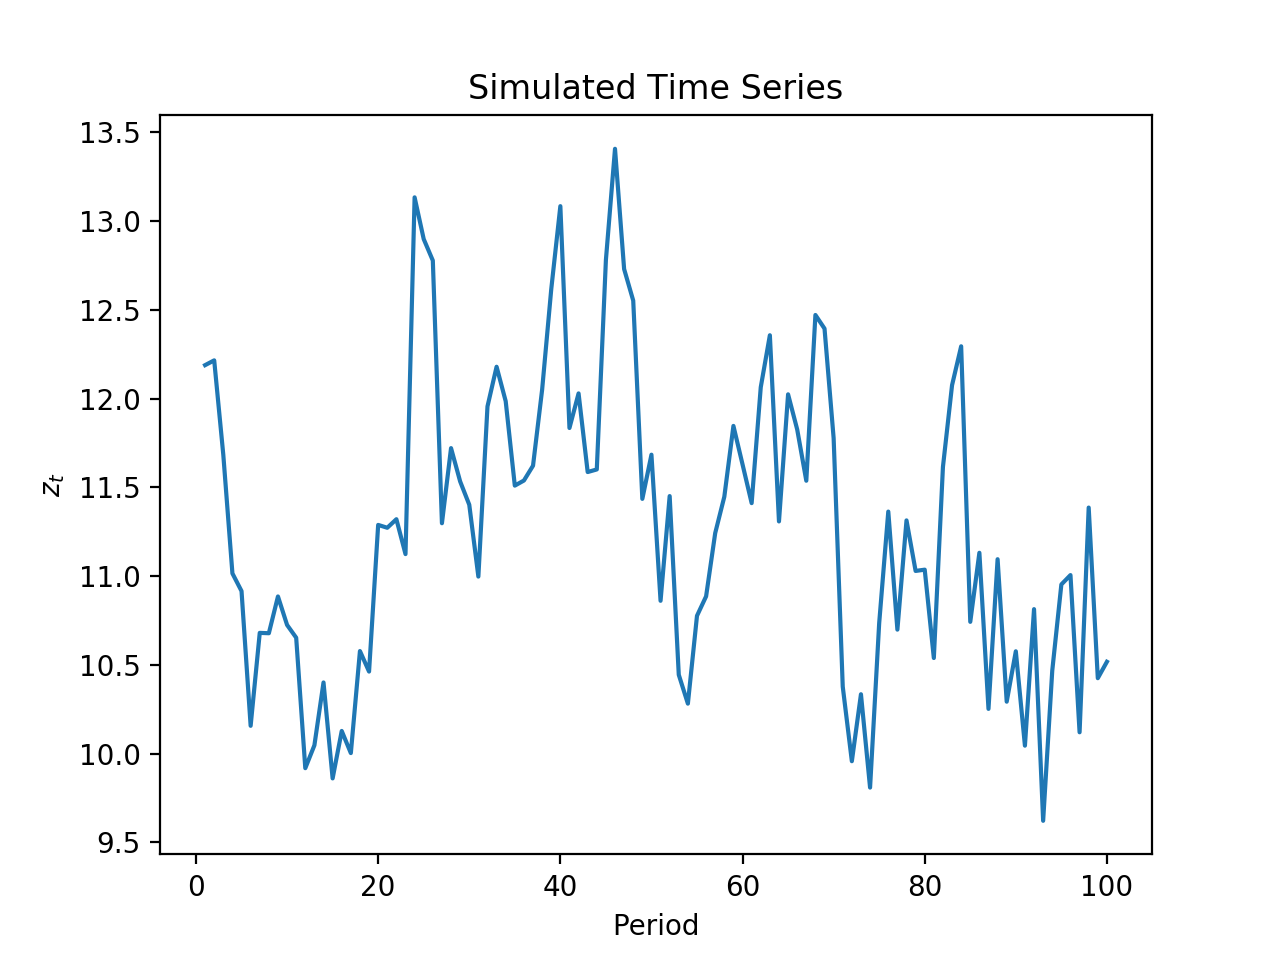

In [2]:
rho = 0.85
mu = 11.4
sigma = 0.7
T = 500

unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T, random_state=25)
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)
z = np.zeros(T+1)
z[0] = mu
for i in range(1, T+1):
    z[i] = rho * z[i-1] + (1 - rho) * mu + eps_vec[i-1]

%matplotlib notebook
plt.plot(np.arange(1, 101), z[1:101])
plt.xlabel('Period')
plt.ylabel('$z_t$')
plt.title("Simulated Time Series")
plt.show()

### (b)

In [3]:
z_vals = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 5)
print(z_vals)

[ 9.3  10.35 11.4  12.45 13.5 ]


### (c)

In [4]:
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]
P_hat = np.zeros((5, 5))
z_t = z[0]
bin_t = 3
for z_t1 in z[1:]:
    if z_t1 <= z_cuts[0]:
        bin_t1 = 1
    elif z_t1 <= z_cuts[1]:
        bin_t1 = 2
    elif z_t1 <= z_cuts[2]:
        bin_t1 = 3
    elif z_t1 <= z_cuts[3]:
        bin_t1 = 4
    else:
        bin_t1 = 5
    P_hat[bin_t - 1][bin_t1 - 1] += 1
    bin_t = bin_t1
    z_t = z_t1
for i in range(5):
    P_hat[i][:] = P_hat[i][:] / sum(P_hat[i][:])
    
print("Transition matrix is\n", P_hat)

Transition matrix is
 [[0.69387755 0.26530612 0.04081633 0.         0.        ]
 [0.09166667 0.55       0.325      0.03333333 0.        ]
 [0.0304878  0.2195122  0.48170732 0.23170732 0.03658537]
 [0.         0.04201681 0.34453782 0.50420168 0.1092437 ]
 [0.         0.         0.04166667 0.35416667 0.60416667]]


### (d)

In [5]:
P_hat_3 = P_hat @ P_hat @ P_hat
print("The transition probability from bin 3 at t to bin 5 at t+3:", P_hat_3[2][4])

The transition probability from bin 3 at t to bin 5 at t+3: 0.08058689966619678


### (e)

In [6]:
X_0 = np.array([[0.2], [0.2], [0.2], [0.2], [0.2]])
X_s = np.dot(LA.matrix_power(P_hat.T, 100), X_0)
print("The steady state vector is:\n", X_s)

The steady state vector is:
 [[0.1045698 ]
 [0.24154031]
 [0.32373493]
 [0.23529555]
 [0.09485941]]


### (f)

In [7]:
z_prime = np.zeros(T + 1)
bin_t = 2
z_prime[0] = z_vals[2]
np.random.seed(25)
for i in range(T):
    z_t1 = np.random.choice(z_vals, p=P_hat[bin_t][:].flatten())
    z_prime[i+1] = z_t1
    if z_t1 <= z_cuts[0]:
        bin_t = 0
    elif z_t1 <= z_cuts[1]:
        bin_t = 1
    elif z_t1 <= z_cuts[2]:
        bin_t = 2
    elif z_t1 <= z_cuts[3]:
        bin_t = 3
    else:
        bin_t = 4

<IPython.core.display.Javascript object>


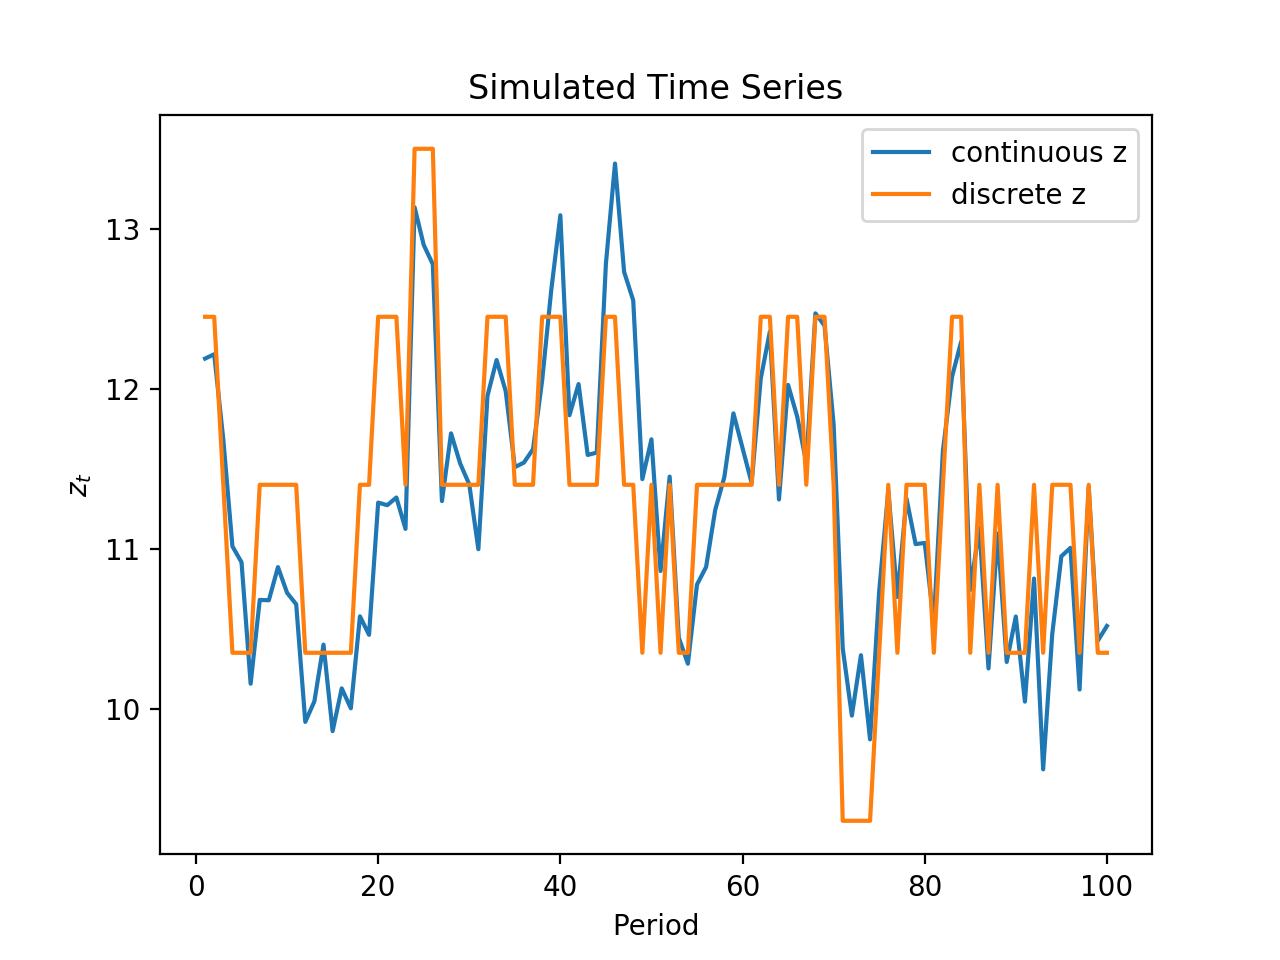

In [8]:
plt.plot(np.arange(1,101), z[1:101], label="continuous z")
plt.plot(np.arange(1,101), z_prime[1:101], label="discrete z")
plt.xlabel("Period")
plt.ylabel("$z_t$")
plt.title("Simulated Time Series")
plt.legend()
plt.show()